<a href="https://colab.research.google.com/github/umleeho1/DataAnalysis/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           

In [ ]:
#Google Drive에 연결 : 왼쪽 폴더 이미지 클릭 

!pwd

/content


In [ ]:
# CSV파일 읽어 오기
# 읽어 오려는 파일 오른쪽 클릭해서 '경로복사'

raw_df = pd.read_csv('/content/owid-covid-data.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244337 entries, 0 to 244336
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    244337 non-null  object 
 1   continent                                   230598 non-null  object 
 2   location                                    244337 non-null  object 
 3   date                                        244337 non-null  object 
 4   total_cases                                 230319 non-null  float64
 5   new_cases                                   230041 non-null  float64
 6   new_cases_smoothed                          228842 non-null  float64
 7   total_deaths                                210886 non-null  float64
 8   new_deaths                                  210803 non-null  float64
 9   new_deaths_smoothed                         209617 non-null  float64
 

# 새 섹션

In [ ]:
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
raw_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
244332,ZWE,Africa,Zimbabwe,2022-12-17,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244333,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244334,ZWE,Africa,Zimbabwe,2022-12-19,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244335,ZWE,Africa,Zimbabwe,2022-12-20,259981.0,625.0,89.286,5637.0,15.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244336,ZWE,Africa,Zimbabwe,2022-12-21,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
#원하는 열 list만들기 (df : data frame)
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population','new_cases','stringency_index']

#원하는 열을 추출한 데이터프레임 생성
revised_df = raw_df[selected_columns]

#수정된 데이터프레임 확인
revised_df.head()

,iso_code,location,date,total_cases,population,new_cases,stringency_index
0,AFG,Afghanistan,2020-02-24,5.0,41128772.0,5.0,8.33
1,AFG,Afghanistan,2020-02-25,5.0,41128772.0,0.0,8.33
2,AFG,Afghanistan,2020-02-26,5.0,41128772.0,0.0,8.33
3,AFG,Afghanistan,2020-02-27,5.0,41128772.0,0.0,8.33
4,AFG,Afghanistan,2020-02-28,5.0,41128772.0,0.0,8.33


In [ ]:
# location 열 추출
location = raw_df['location']
location

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
244332       Zimbabwe
244333       Zimbabwe
244334       Zimbabwe
244335       Zimbabwe
244336       Zimbabwe
Name: location, Length: 244337, dtype: object

In [ ]:
#location열의 유일한 값 확인
location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [ ]:
kor_total_df = raw_df[raw_df.location=='South Korea']
kor_total_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203696,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203697,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203698,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203699,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203700,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,43.4,0.17,2.47,0.837582


In [ ]:
## South Korea 데이터 프레임 생성

kor_df = revised_df[revised_df.location=='South Korea']

kor_df.head()

,iso_code,location,date,total_cases,population,new_cases,stringency_index
203696,KOR,South Korea,2020-01-22,1.0,51815808.0,NaN,0.0
203697,KOR,South Korea,2020-01-23,1.0,51815808.0,0.0,0.0
203698,KOR,South Korea,2020-01-24,2.0,51815808.0,1.0,0.0
203699,KOR,South Korea,2020-01-25,2.0,51815808.0,0.0,0.0
203700,KOR,South Korea,2020-01-26,3.0,51815808.0,1.0,0.0


In [ ]:
## United States 데이터 프레임 생성

usa_df = revised_df[revised_df.location=='United States']

usa_df.head()

,iso_code,location,date,total_cases,population,new_cases,stringency_index
229641,USA,United States,2020-01-22,1.0,338289856.0,NaN,0.0
229642,USA,United States,2020-01-23,1.0,338289856.0,0.0,0.0
229643,USA,United States,2020-01-24,2.0,338289856.0,1.0,0.0
229644,USA,United States,2020-01-25,2.0,338289856.0,0.0,0.0
229645,USA,United States,2020-01-26,5.0,338289856.0,3.0,0.0


In [ ]:
# date로 index변경

kor_date_index_df = kor_df.set_index('date')
usa_date_index_df = usa_df.set_index('date')


In [ ]:
kor_date_index_df.head()

,iso_code,location,total_cases,population,new_cases,stringency_index
date,,,,,,
2020-01-22,KOR,South Korea,1.0,51815808.0,NaN,0.0
2020-01-23,KOR,South Korea,1.0,51815808.0,0.0,0.0
2020-01-24,KOR,South Korea,2.0,51815808.0,1.0,0.0
2020-01-25,KOR,South Korea,2.0,51815808.0,0.0,0.0
2020-01-26,KOR,South Korea,3.0,51815808.0,1.0,0.0


In [ ]:
usa_date_index_df.head()

,iso_code,location,total_cases,population,new_cases,stringency_index
date,,,,,,
2020-01-22,USA,United States,1.0,338289856.0,NaN,0.0
2020-01-23,USA,United States,1.0,338289856.0,0.0,0.0
2020-01-24,USA,United States,2.0,338289856.0,1.0,0.0
2020-01-25,USA,United States,2.0,338289856.0,0.0,0.0
2020-01-26,USA,United States,5.0,338289856.0,3.0,0.0


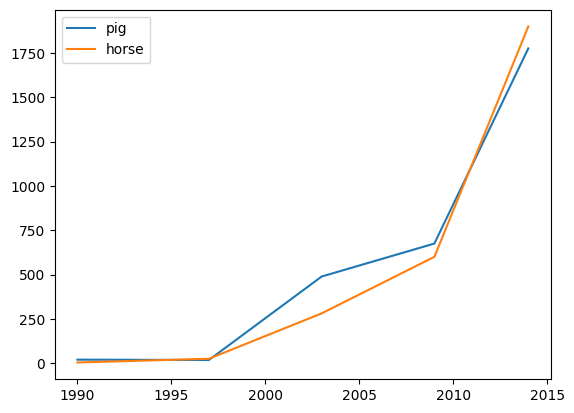

In [ ]:
# 그래프 작성 예

df = pd.DataFrame({
    'pig' : [20, 18, 489, 675, 1776],
    'horse' : [4, 25, 281, 600, 1900],
    }, index=[1990, 1997, 2003, 2009, 2014])

lines = df.plot.line()

In [ ]:
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-12-17    28188293.0
2022-12-18    28214915.0
2022-12-19    28302474.0
2022-12-20    28390646.0
2022-12-21    28466390.0
Name: total_cases, Length: 1065, dtype: float64

In [ ]:
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22            1.0
2020-01-23            1.0
2020-01-24            2.0
2020-01-25            2.0
2020-01-26            5.0
                 ...     
2022-12-17     99898101.0
2022-12-18     99903000.0
2022-12-19     99960973.0
2022-12-20    100014301.0
2022-12-21    100184506.0
Name: total_cases, Length: 1065, dtype: float64

In [ ]:
final_df = pd.DataFrame({
    'KOR' : kor_total_cases,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_df.head()

,KOR,USA
date,,
2020-01-22,1.0,1.0
2020-01-23,1.0,1.0
2020-01-24,2.0,2.0
2020-01-25,2.0,2.0
2020-01-26,3.0,5.0


<Axes: xlabel='date'>

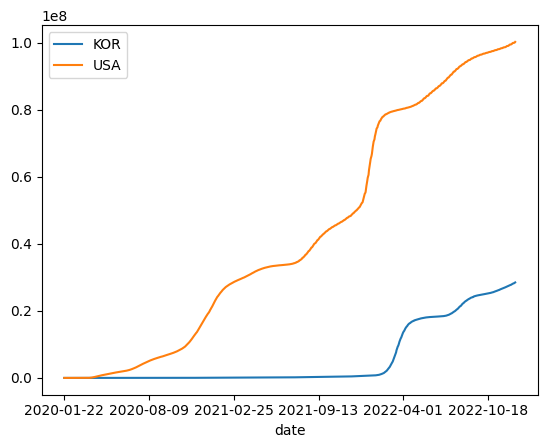

In [ ]:
# .plot.line() 함수를 이용해서 선 그래프 그리기
final_df.plot.line()

<Axes: xlabel='date'>

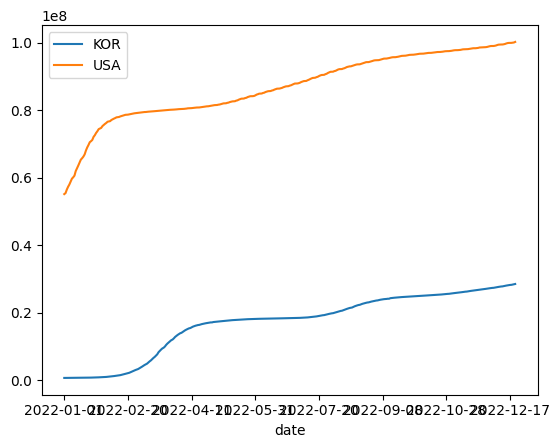

In [ ]:
#원하는 X축의 범쉬 설정 : 슬라이싱
final_df['2022-01-01':].plot.line()

<Axes: xlabel='date'>

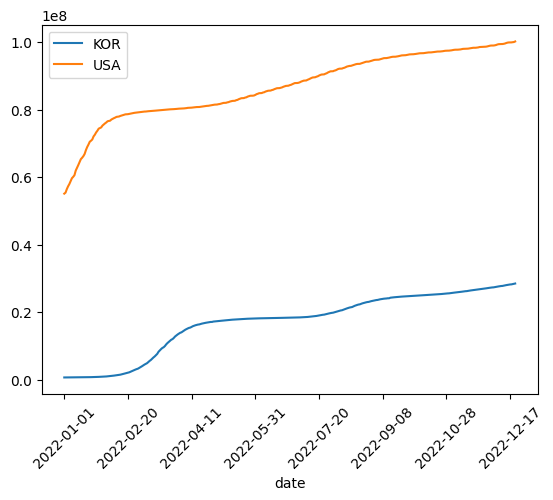

In [ ]:
# X축에 각도 넣기
final_df['2022-01-01':].plot.line(rot=45)

In [ ]:
kor_population = kor_date_index_df['population']['2020-01-22']

usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population, ') / 대한민국 인구(', kor_population, ')')

미국 인구( 338289856.0 ) / 대한민국 인구( 51815808.0 )


In [ ]:
# 인구비율 구하기

rate = round((usa_population/kor_population), 2)
rate

6.53

In [ ]:
#확진자 비율을 적용한 최종 데이터 프레임 생성

final_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * rate,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_revised_df.head()

,KOR,USA
date,,
2020-01-22,6.53,1.0
2020-01-23,6.53,1.0
2020-01-24,13.06,2.0
2020-01-25,13.06,2.0
2020-01-26,19.59,5.0


<Axes: xlabel='date'>

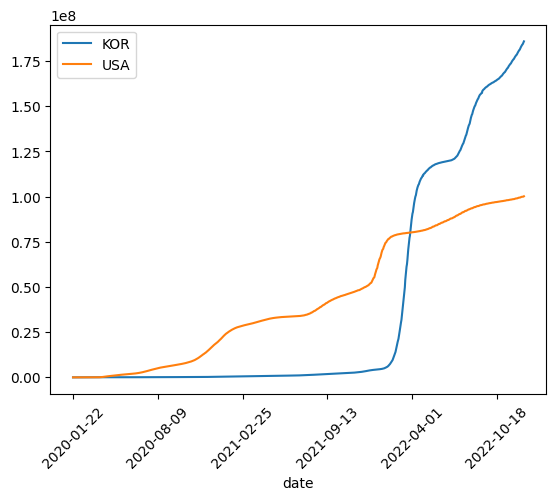

In [ ]:
final_revised_df[:].plot.line(rot=45)

<Axes: xlabel='date'>

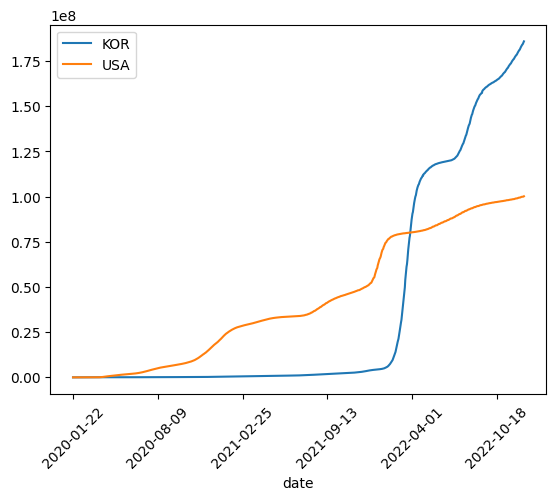

In [ ]:
final_revised_df['2020-01-01':].plot.line(rot=45)

In [ ]:
# csv 파일 읽어오기
raw_hawaii_df = pd.read_csv('/content/hawaii-coviddata.csv')

In [ ]:
#일부 데이터 확인하기
raw_hawaii_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,06/17/2021,HI,35862,NaN,NaN,31,0.0,504,NaN,NaN,0,0.0,06/18/2021 01:48:26 PM,Not agree,Not agree
1,12/30/2021,HI,106350,NaN,NaN,3425,368.0,1074,NaN,NaN,0,0.0,12/31/2021 02:32:16 PM,Not agree,Not agree
2,11/12/2020,HI,16171,NaN,NaN,94,0.0,221,NaN,NaN,0,0.0,11/13/2020 02:54:34 PM,Not agree,Not agree
3,11/10/2020,HI,15961,NaN,NaN,69,0.0,221,NaN,NaN,1,0.0,11/11/2020 03:15:25 PM,Not agree,Not agree
4,07/23/2021,HI,38499,NaN,NaN,215,5.0,524,NaN,NaN,0,0.0,07/24/2021 02:21:11 PM,Not agree,Not agree


In [ ]:
#데이터 정보 확인하기
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  1001 non-null   object 
 1   state            1001 non-null   object 
 2   tot_cases        1001 non-null   int64  
 3   conf_cases       0 non-null      float64
 4   prob_cases       0 non-null      float64
 5   new_case         1001 non-null   int64  
 6   pnew_case        958 non-null    float64
 7   tot_death        1001 non-null   int64  
 8   conf_death       0 non-null      float64
 9   prob_death       0 non-null      float64
 10  new_death        1001 non-null   int64  
 11  pnew_death       912 non-null    float64
 12  created_at       1001 non-null   object 
 13  consent_cases    1001 non-null   object 
 14  consent_deaths   1001 non-null   object 
dtypes: float64(6), int64(4), object(5)
memory usage: 117.4+ KB


In [ ]:
 # 필요한 행 추출
filtered_hawaii_df = raw_hawaii_df[['submission_date', 'tot_cases']]

# 일부 데이터 확인
filtered_hawaii_df.head()

,submission_date,tot_cases
0,06/17/2021,35862
1,12/30/2021,106350
2,11/12/2020,16171
3,11/10/2020,15961
4,07/23/2021,38499


In [ ]:
# 데이터 정렬하기
sorted_hawaii_df = filtered_hawaii_df.sort_values(by='submission_date')
# 정렬된 데이터 확인하기
sorted_hawaii_df

,submission_date,tot_cases
14,01/01/2021,21258
793,01/01/2022,112283
420,01/02/2021,21417
818,01/02/2022,115400
551,01/03/2021,21539
...,...,...
544,12/29/2021,102925
913,12/30/2020,20851
1,12/30/2021,106350
895,12/31/2020,21026


In [ ]:
# submission_date를 date 타입으로 변환하여 열 추가하기
sorted_hawaii_df['date'] = pd.to_datetime(filtered_hawaii_df['submission_date'])
# 일부 데이터 확인하기
sorted_hawaii_df.head()


,submission_date,tot_cases,date
14,01/01/2021,21258,2021-01-01
793,01/01/2022,112283,2022-01-01
420,01/02/2021,21417,2021-01-02
818,01/02/2022,115400,2022-01-02
551,01/03/2021,21539,2021-01-03


In [ ]:
 # 색인 변경하기
sorted_hawaii_df.set_index('date', inplace=True)
# 데이터 확인하기
sorted_hawaii_df

,submission_date,tot_cases
date,,
2021-01-01,01/01/2021,21258
2022-01-01,01/01/2022,112283
2021-01-02,01/02/2021,21417
2022-01-02,01/02/2022,115400
2021-01-03,01/03/2021,21539
...,...,...
2021-12-29,12/29/2021,102925
2020-12-30,12/30/2020,20851
2021-12-30,12/30/2021,106350


In [ ]:
 # 하와이 확진자 수 시리즈 만들기
hawaii_total_cases = sorted_hawaii_df['tot_cases']
# 데이터 확인하기
hawaii_total_cases


date
2021-01-01     21258
2022-01-01    112283
2021-01-02     21417
2022-01-02    115400
2021-01-03     21539
               ...  
2021-12-29    102925
2020-12-30     20851
2021-12-30    106350
2020-12-31     21026
2021-12-31    109576
Name: tot_cases, Length: 1001, dtype: int64

In [ ]:
# 하와이 인구
hawaii_population = 1_433_336

# 하와이와 대한민국의 인구 비율 구하기
hawaii_rate = round((hawaii_population / kor_population),2)
hawaii_rate

0.03

In [ ]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
'KOR': kor_total_cases * hawaii_rate, # 비율 반영
'HAWAII' : hawaii_total_cases
}, index=kor_date_index_df.index
)
# 일부 데이터 확인하기
final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0.0
2020-01-23,0.03,0.0
2020-01-24,0.06,0.0
2020-01-25,0.06,0.0
2020-01-26,0.09,0.0
...,...,...
2022-12-17,845648.79,NaN
2022-12-18,846447.45,NaN
2022-12-19,849074.22,NaN


In [ ]:
 # 대한민국 확진자 수 시리즈 확인하기
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-12-17    28188293.0
2022-12-18    28214915.0
2022-12-19    28302474.0
2022-12-20    28390646.0
2022-12-21    28466390.0
Name: total_cases, Length: 1065, dtype: float64

In [ ]:
# 대한민국 시리즈 색인 데이터 타입 확인
str(kor_total_cases.index.dtype)

'object'

In [ ]:
str(hawaii_total_cases.index.dtype)

'datetime64[ns]'

In [ ]:
 # 하와이 시리즈 색인 데이터 타입 문자열로 변경하기
hawaii_total_cases.index = hawaii_total_cases.index.astype('string')
# 하와이 시리즈 색인 데이터 타입 재확인
str(hawaii_total_cases.index.dtype)


'string'

In [ ]:
 # 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
'KOR': kor_total_cases * hawaii_rate, # 비율 반영
'HAWAII' : hawaii_total_cases
}, index=kor_date_index_df.index
)
# 데이터 확인하기
final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0.0
2020-01-23,0.03,0.0
2020-01-24,0.06,0.0
2020-01-25,0.06,0.0
2020-01-26,0.09,0.0
...,...,...
2022-12-17,845648.79,NaN
2022-12-18,846447.45,NaN
2022-12-19,849074.22,NaN


<Axes: xlabel='date'>

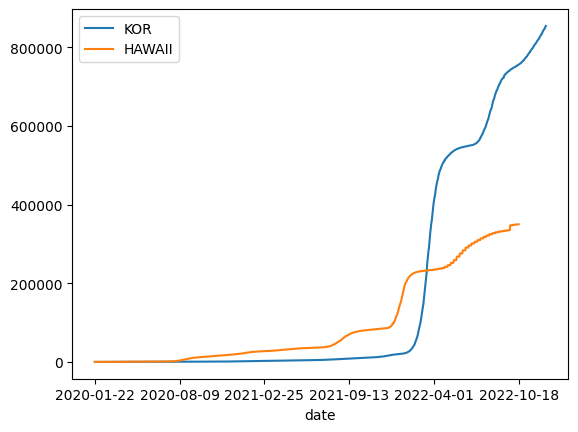

In [ ]:
 # 선 그래프 그리기
final_hawaii_revised_df.plot.line()


<Axes: xlabel='date'>

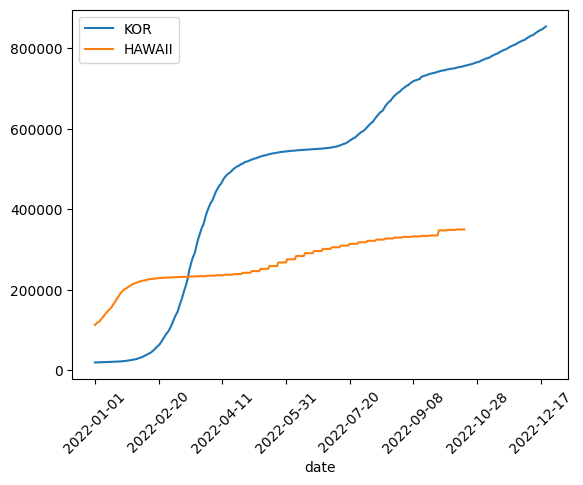

In [ ]:
 # 올해 그래프 확인하기 (2022)
final_hawaii_revised_df['2022-01-01':].plot.line(rot=45)


In [ ]:
us_hawaii_rate = round((hawaii_population / usa_population), 3)
us_hawaii_rate

0.004

In [ ]:
 # 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_full_revised_df = pd.DataFrame({
'KOR': kor_total_cases * hawaii_rate, # 비율 반영
'USA': usa_total_cases * us_hawaii_rate,
'HAWAII' : hawaii_total_cases
}, index=kor_date_index_df.index
)
# 데이터 확인하기
final_full_revised_df

,KOR,USA,HAWAII
date,,,
2020-01-22,0.03,0.004,0.0
2020-01-23,0.03,0.004,0.0
2020-01-24,0.06,0.008,0.0
2020-01-25,0.06,0.008,0.0
2020-01-26,0.09,0.020,0.0
...,...,...,...
2022-12-17,845648.79,399592.404,NaN
2022-12-18,846447.45,399612.000,NaN
2022-12-19,849074.22,399843.892,NaN


<Axes: xlabel='date'>

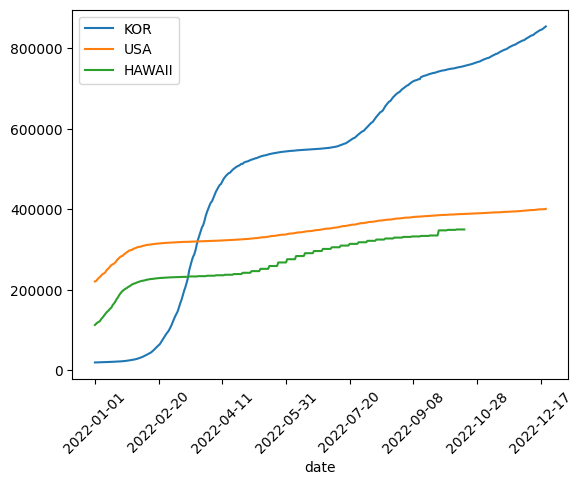

In [ ]:
final_full_revised_df['2022-01-01':].plot.line(rot=45)

In [ ]:
# csv 파일 읽어오기
raw_states_df = pd.read_csv('/content/unite_state-coviddata.csv')

In [ ]:
#일부 데이터 확인하기
raw_states_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,10/05/2022,TX,7880387,NaN,NaN,3563,1260.0,89268,NaN,NaN,34,0.0,10/06/2022 01:30:56 PM,Not agree,Not agree
1,03/06/2020,TX,5,NaN,NaN,5,0.0,0,NaN,NaN,0,0.0,03/08/2020 12:00:00 AM,Not agree,Not agree
2,01/13/2021,WA,279470,NaN,NaN,2431,481.0,3838,NaN,NaN,49,0.0,01/13/2021 12:00:00 AM,NaN,NaN
3,12/22/2020,WA,227277,NaN,NaN,2044,39.0,3131,NaN,NaN,25,0.0,12/22/2020 12:00:00 AM,NaN,NaN
4,06/13/2020,TX,86011,NaN,NaN,2331,0.0,2287,NaN,NaN,39,0.0,06/15/2020 12:00:00 AM,Not agree,Not agree


In [ ]:
raw_states_df['date'] = pd.to_datetime(raw_states_df['submission_date'])
raw_states_df.sort_values(by='date', inplace=True)
raw_states_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,data,date
1437,01/22/2020,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree,2020-01-22,2020-01-22
4499,01/22/2020,TX,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree,2020-01-22,2020-01-22
4405,01/22/2020,WA,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/22/2020 12:00:00 AM,NaN,NaN,2020-01-22,2020-01-22
1400,01/22/2020,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,2020-01-22,2020-01-22
1498,01/22/2020,VA,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/22/2020 12:00:00 AM,Agree,Agree,2020-01-22,2020-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,10/18/2022,WA,1828918,NaN,NaN,12,0.0,14464,NaN,NaN,0,0.0,10/19/2022 01:15:24 PM,NaN,NaN,2022-10-18,2022-10-18
2352,10/18/2022,CA,11309237,10458792.0,850445.0,0,0.0,95604,NaN,NaN,0,0.0,10/19/2022 01:15:24 PM,Agree,Not agree,2022-10-18,2022-10-18
1101,10/18/2022,VA,2106527,1490236.0,616291.0,942,434.0,22057,18326.0,3731.0,16,2.0,10/19/2022 01:15:24 PM,Agree,Agree,2022-10-18,2022-10-18
3239,10/18/2022,IL,3789532,3789532.0,0.0,1333,0.0,39867,35143.0,4724.0,11,3.0,10/19/2022 01:15:24 PM,Agree,Agree,2022-10-18,2022-10-18


In [ ]:
raw_states_df.set_index('date', inplace=True)
raw_states_df

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,data
date,,,,,,,,,,,,,,,,
2020-01-22,01/22/2020,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree,2020-01-22
2020-01-22,01/22/2020,TX,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree,2020-01-22
2020-01-22,01/22/2020,WA,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/22/2020 12:00:00 AM,NaN,NaN,2020-01-22
2020-01-22,01/22/2020,IL,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree,2020-01-22
2020-01-22,01/22/2020,VA,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,01/22/2020 12:00:00 AM,Agree,Agree,2020-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,10/18/2022,WA,1828918,NaN,NaN,12,0.0,14464,NaN,NaN,0,0.0,10/19/2022 01:15:24 PM,NaN,NaN,2022-10-18
2022-10-18,10/18/2022,CA,11309237,10458792.0,850445.0,0,0.0,95604,NaN,NaN,0,0.0,10/19/2022 01:15:24 PM,Agree,Not agree,2022-10-18
2022-10-18,10/18/2022,VA,2106527,1490236.0,616291.0,942,434.0,22057,18326.0,3731.0,16,2.0,10/19/2022 01:15:24 PM,Agree,Agree,2022-10-18


In [ ]:
#5개 주 전체 확진자수 구하기
ca_total_cases = raw_states_df[raw_states_df.state == 'CA']['tot_cases']
tx_total_cases = raw_states_df[raw_states_df.state == 'TX']['tot_cases']
va_total_cases = raw_states_df[raw_states_df.state == 'VA']['tot_cases']
il_total_cases = raw_states_df[raw_states_df.state == 'IL']['tot_cases']
wa_total_cases = raw_states_df[raw_states_df.state == 'WA']['tot_cases']

In [ ]:
#5개 주 인구수 정보
ca_population = 39_995_077
tx_population = 29_945_493
va_population = 8_757_467
il_population = 12_808_884
wa_population = 7_901_429

In [ ]:
#5개 주 인구 비율 (분모:CA)
tx_rate = round(tx_population/ ca_population, 2)
va_rate = round(va_population/ ca_population, 2)
il_rate = round(il_population/ ca_population, 2)
wa_rate = round(wa_population/ ca_population, 2)

In [ ]:
#확진자 비율을 적용한 최종 데이터 프레임 생성하기
final_states_df = pd.DataFrame({
    'CA': ca_total_cases,
    'TX': ca_total_cases * tx_rate,
    'VA': ca_total_cases * va_rate,
    'IL': ca_total_cases * il_rate,
    'WA': ca_total_cases * wa_rate
    }, index=ca_total_cases.index
)

<Axes: xlabel='date'>

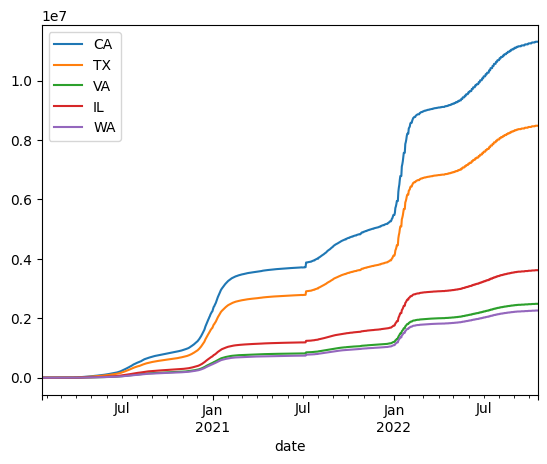

In [ ]:
final_states_df.plot.line()

<Axes: xlabel='date'>

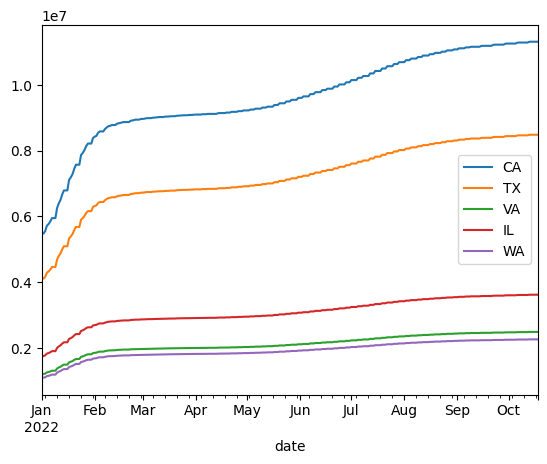

In [ ]:
final_states_df['2022-01-01':].plot.line()